# etherium  prediction 



In [1]:
#importing dependencies
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from statsmodels.tsa.arima.model import ARIMA

In [2]:
ETH=pd.read_csv("Gemini_ETHBTC_d.csv")

In [3]:
ETH.head()


,unix,date,symbol,open,high,low,close,Volume ETH,Volume BTC
0,1.683940e+12,13-05-2023,ETH,0.06748,0.06758,0.06671,0.06707,76.378691,5.122719
1,1.683850e+12,12-05-2023,ETH,0.06654,0.06786,0.06612,0.06748,236.085207,15.931030
2,1.683760e+12,11-05-2023,ETH,0.06664,0.06674,0.06607,0.06654,62.969007,4.189958
3,1.683680e+12,10-05-2023,ETH,0.06692,0.06705,0.06636,0.06664,77.042456,5.134109
4,1.683590e+12,09-05-2023,ETH,0.06672,0.06715,0.06657,0.06692,61.346082,4.105280


# data preprocessing 


In [4]:
ETH.drop(['unix'],axis=1,inplace=True)

In [5]:
ETH.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2918 entries, 0 to 2917
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        2918 non-null   object 
 1   symbol      2918 non-null   object 
 2   open        2918 non-null   float64
 3   high        2918 non-null   float64
 4   low         2918 non-null   float64
 5   close       2918 non-null   float64
 6   Volume ETH  2918 non-null   float64
 7   Volume BTC  2918 non-null   float64
dtypes: float64(6), object(2)
memory usage: 182.5+ KB


In [6]:
ETH['date']=pd.to_datetime(ETH['date'],format='%d-%m-%Y')

In [7]:
#nulll value check
ETH.isnull().sum()



date          0
symbol        0
open          0
high          0
low           0
close         0
Volume ETH    0
Volume BTC    0
dtype: int64

<AxesSubplot:>

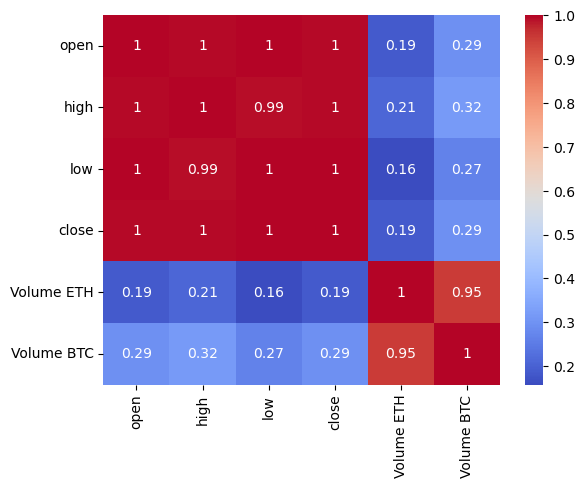

In [8]:
#correlation matrix
corr=ETH.corr()
sb.heatmap(corr, cmap='coolwarm', annot=True)


In [9]:
#droping uneccesary column
ETH.drop(['Volume BTC'],axis=1,inplace=True)

In [10]:
ETH.drop(['symbol'],axis=1,inplace=True)

In [11]:
ETH.head()

,date,open,high,low,close,Volume ETH
0,2023-05-13,0.06748,0.06758,0.06671,0.06707,76.378691
1,2023-05-12,0.06654,0.06786,0.06612,0.06748,236.085207
2,2023-05-11,0.06664,0.06674,0.06607,0.06654,62.969007
3,2023-05-10,0.06692,0.06705,0.06636,0.06664,77.042456
4,2023-05-09,0.06672,0.06715,0.06657,0.06692,61.346082


In [12]:
# Split the data into training and testing sets
train_df = ETH[30:]
test_df = ETH[:30]

# Define the feature columns and target column
feature_cols = ['open', 'high', 'low', 'Volume ETH']
target_col = 'close'

In [13]:
#applying linear regression 

# Split the training data into X and y
X_train = train_df[feature_cols].copy()
y_train = train_df[target_col].copy()

# Train a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict the prices for the testing data
X_test = test_df[feature_cols].copy()
y_test_pred = lr.predict(X_test)

# Combine the predicted prices with the actual prices in a DataFrame
test_df['LR_close'] = y_test_pred
result_df = test_df[['date', 'close', 'LR_close']]

C:\Users\DELL\AppData\Local\Temp\ipykernel_15228\383405041.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['LR_close'] = y_test_pred


In [14]:
# Split the training data into X and y
X_train = train_df[feature_cols].copy()
y_train = train_df[target_col].copy()

# Train a random forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict the prices for the testing data
X_test = test_df[feature_cols].copy()
y_test_pred = rf.predict(X_test)

# Combine the predicted prices with the actual prices in a DataFrame
result_df.loc[:,'RF_close'] = y_test_pred

# Print the actual and predicted prices for the testing data


C:\Users\DELL\AppData\Local\Temp\ipykernel_15228\2209159060.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df.loc[:,'RF_close'] = y_test_pred


In [15]:
#gradient boosting 


# Split the training data into X and y
X_train = train_df[feature_cols].copy()
y_train = train_df[target_col].copy()

# Train a gradient boosting model
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)

# Predict the prices for the testing data
X_test = test_df[feature_cols].copy()
y_test_pred = gb.predict(X_test)

# Combine the predicted prices with the actual prices in a DataFrame
result_df.loc[:,'GB_close'] = y_test_pred



C:\Users\DELL\AppData\Local\Temp\ipykernel_15228\3566774679.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df.loc[:,'GB_close'] = y_test_pred


In [17]:
#LSTM
# Scale the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_df[['close']])
test_scaled = scaler.transform(test_df[['close']])

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(1, 1)))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Reshape the data for the LSTM model
X_train = train_scaled[:-1]
y_train = train_scaled[1:]
X_train = X_train.reshape(X_train.shape[0], 1, 1)
y_train = y_train.reshape(y_train.shape[0], 1)

# Train the LSTM model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Prepare the testing data
X_test = test_scaled[:-1]
y_test_actual = test_scaled[1:]
X_test = X_test.reshape(X_test.shape[0], 1, 1)
y_test_actual = y_test_actual.reshape(y_test_actual.shape[0], 1)

# Predict the prices for the testing data
y_test_pred = model.predict(X_test)

# Inverse transform the scaled prices to get the actual prices
y_test_pred = scaler.inverse_transform(y_test_pred)
y_test_actual = scaler.inverse_transform(y_test_actual)

# Create a DataFrame to store the predicted values and actual prices
result_lstm_df = pd.DataFrame({'Date': test_df['date'].values[:-1], 'close': y_test_actual.flatten(), 'LSTM_close': y_test_pred.flatten()})

print(result_lstm_df)

Epoch 1/100
91/91 [==============================] - 2s 3ms/step - loss: 0.0468
Epoch 2/100
91/91 [==============================] - 0s 2ms/step - loss: 0.0122
Epoch 3/100
91/91 [==============================] - 0s 2ms/step - loss: 0.0063
Epoch 4/100
91/91 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 5/100
91/91 [==============================] - 0s 2ms/step - loss: 3.7406e-04
Epoch 6/100
91/91 [==============================] - 0s 2ms/step - loss: 2.5950e-04
Epoch 7/100
91/91 [==============================] - 0s 2ms/step - loss: 2.5442e-04
Epoch 8/100
91/91 [==============================] - 0s 2ms/step - loss: 2.5339e-04
Epoch 9/100
91/91 [==============================] - 0s 2ms/step - loss: 2.5498e-04
Epoch 10/100
91/91 [==============================] - 0s 2ms/step - loss: 2.4692e-04
Epoch 11/100
91/91 [==============================] - 0s 2ms/step - loss: 2.4384e-04
Epoch 12/100
91/91 [==============================] - 0s 2ms/step - loss: 2.4181e-04
Epoch

91/91 [==============================] - 0s 2ms/step - loss: 2.1298e-04
Epoch 98/100
91/91 [==============================] - 0s 2ms/step - loss: 2.1344e-04
Epoch 99/100
91/91 [==============================] - 0s 2ms/step - loss: 2.1940e-04
Epoch 100/100
1/1 [==============================] - 0s 351ms/step
         Date    close  LSTM_close
0  2023-05-13  0.06748    0.066091
1  2023-05-12  0.06654    0.066493
2  2023-05-11  0.06664    0.065571
3  2023-05-10  0.06692    0.065669
4  2023-05-09  0.06672    0.065943
5  2023-05-08  0.06584    0.065747
6  2023-05-07  0.06574    0.064884
7  2023-05-06  0.06756    0.064785
8  2023-05-05  0.06512    0.066571
9  2023-05-04  0.06560    0.064177
10 2023-05-03  0.06528    0.064648
11 2023-05-02  0.06512    0.064334
12 2023-05-01  0.06395    0.064177
13 2023-04-30  0.06520    0.063028
14 2023-04-29  0.06454    0.064255
15 2023-04-28  0.06482    0.063607
16 2023-04-27  0.06588    0.063882
17 2023-04-26  0.06597    0.064923
18 2023-04-25  0.06693    

In [20]:
result_df['symbol']='ETH'
result_df.to_excel('ETH_PREDICTIONS.xlsx')

C:\Users\DELL\AppData\Local\Temp\ipykernel_15228\1144413994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['symbol']='ETH'


In [19]:

result_df

,date,close,LR_close,RF_close,GB_close,symbol
0,2023-05-13,0.06707,0.067259,0.067165,0.067121,ETH
1,2023-05-12,0.06748,0.067146,0.067036,0.066738,ETH
2,2023-05-11,0.06654,0.066540,0.066232,0.066697,ETH
3,2023-05-10,0.06664,0.066842,0.066803,0.067033,ETH
4,2023-05-09,0.06692,0.067048,0.066892,0.067121,ETH
5,2023-05-08,0.06672,0.066443,0.066010,0.066422,ETH
6,2023-05-07,0.06584,0.066185,0.065854,0.065753,ETH
7,2023-05-06,0.06574,0.066219,0.065426,0.066390,ETH
8,2023-05-05,0.06756,0.066263,0.066158,0.066390,ETH
9,2023-05-04,0.06512,0.065439,0.065310,0.065679,ETH
